In [ ]:
#Edgar Moises Hernandez-Gonzalez
#09/07/19-16/12/19
#Clasificar habla imaginada en EEG con ConvLSTM2D

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dropout, Flatten, Dense

In [2]:
datos = pd.read_csv("Submuestreo01.csv", header=None)
x = datos.iloc[:, 0:3072]
y = datos.iloc[:, 3072]

In [3]:
print(x.shape)
print(y.shape)

(132, 3072)
(132,)


In [4]:
n_samples = len(y)
print("n_samples:", n_samples)

n_samples: 132


In [5]:
n_classes = len(np.unique(y))
print("n_classes:", n_classes)

n_classes: 6


In [6]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
x = StandardScaler().fit_transform(x)

In [7]:
#convertir de 2D a 5D
x = x.reshape((n_samples, 1, 1, 6, 512))
print(x.shape)

(132, 1, 1, 6, 512)


In [9]:
x = np.transpose(x, (0,1,2,4,3))

print(x.shape)

(132, 1, 1, 512, 6)


In [10]:
#dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [24]:
model = Sequential()
model.add(ConvLSTM2D(32, (1,3), activation='relu', input_shape=(1,1,512,6)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_3 (ConvLSTM2D)  (None, 1, 510, 32)        14720     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 510, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 16320)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                522272    
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 198       
Total params: 537,190
Trainable params: 537,190
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 99, validation_data=(x_test, y_test))

Train on 99 samples, validate on 33 samples
Epoch 1/20
99/99 [==============================] - 1s 9ms/sample - loss: 1.8088 - acc: 0.1212 - val_loss: 1.8096 - val_acc: 0.1212
Epoch 2/20
99/99 [==============================] - 0s 587us/sample - loss: 1.7301 - acc: 0.4141 - val_loss: 1.8105 - val_acc: 0.3030
Epoch 3/20
99/99 [==============================] - 0s 832us/sample - loss: 1.6106 - acc: 0.6263 - val_loss: 1.8005 - val_acc: 0.2121
Epoch 4/20
99/99 [==============================] - 0s 737us/sample - loss: 1.4759 - acc: 0.7980 - val_loss: 1.7976 - val_acc: 0.0909
Epoch 5/20
99/99 [==============================] - 0s 710us/sample - loss: 1.3128 - acc: 0.8687 - val_loss: 1.8218 - val_acc: 0.1212
Epoch 6/20
99/99 [==============================] - 0s 701us/sample - loss: 1.1691 - acc: 0.8586 - val_loss: 1.8419 - val_acc: 0.1212
Epoch 7/20
99/99 [==============================] - 0s 704us/sample - loss: 1.0011 - acc: 0.8990 - val_loss: 1.8547 - val_acc: 0.2121
Epoch 8/20
99/99 [==

In [28]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

33/33 [==============================] - 0s 725us/sample - loss: 3.3713 - acc: 0.2121
Test loss: 3.3713331439278345
Test accuracy: 0.21212122


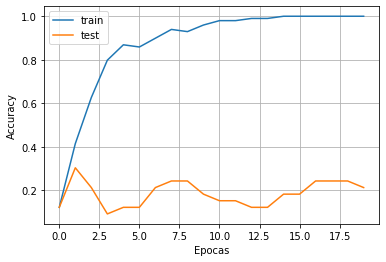

In [29]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

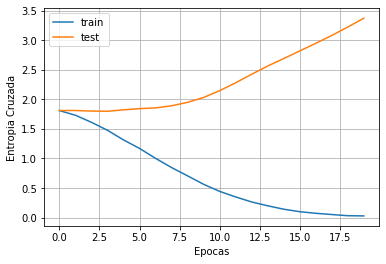

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()